In [1]:
from skimage import io
from skimage.transform import resize
import math 
import pickle 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  OneHotEncoder
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from os import listdir, path, makedirs
import cv2 
import os

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [2]:
# mount the drive to get data

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
def load_images_from_folder(folder,label):
    images = []
    labels = []
    imageNames = []
    for filename in os.listdir(folder):
        if '.tif' in filename or '.TIF' in filename:
            # img = io.imread(os.path.join(folder,filename)) /255 
            img = cv2.cvtColor(cv2.imread(os.path.join(folder,filename)), cv2.COLOR_BGR2GRAY)
            img = img/255
            if img is not None:
                images.append(img)
                labels.append(label)
                imageNames.append(filename)
    return np.array(images),np.array(labels),imageNames

In [4]:
data_dir = '/content/gdrive/MyDrive/dataset'

In [5]:
folder_names = [f for f in listdir(data_dir)]

In [6]:
count_img = 0
for folder in folder_names:
    imgs = [img for img in listdir(path.join(data_dir, folder))]
    count_img += len(imgs)
    print(folder, len(imgs))

golgia 88
dna 88
actin 99
golgpp 86
lysosome 85
endosome 92
mitochondria 74
nucleolus 81
microtubules 92
er 87


In [7]:
golgia,golgia_labels,imagenames0         = load_images_from_folder(path.join(data_dir, 'golgia'),'golgia')
dna,dna_labels,imagenames1              = load_images_from_folder(path.join(data_dir, 'dna'),'dna')
actin,actin_labels,imagenames2                = load_images_from_folder(path.join(data_dir, 'actin'),'actin')
golgpp,golgpp_labels,imagenames3          = load_images_from_folder(path.join(data_dir, 'golgpp'),'golgpp')
lysosome,lysosome_labels,imagenames4              = load_images_from_folder(path.join(data_dir, 'lysosome'),'lysosome')
endosome,endosome_labels,imagenames5          = load_images_from_folder(path.join(data_dir, 'endosome'),'endosome')
mitochondria,mitochondria_labels,imagenames6       = load_images_from_folder(path.join(data_dir, 'mitochondria'),'mitochondria')
nucleolus,nucleolus_labels,imagenames7          = load_images_from_folder(path.join(data_dir, 'nucleolus'),'nucleolus')
microtubules,microtubules_labels,imagenames8        = load_images_from_folder(path.join(data_dir, 'microtubules'),'microtubules')
er,er_labels,imagenames9                = load_images_from_folder(path.join(data_dir, 'er'),'er')

In [8]:
X = []
Y = []
imageNames = [] 


for i in range(len(golgia)):
    X.append(golgia[i])
    Y.append(golgia_labels[i])
    imageNames.append('golgia - ' + imagenames0[i])

for i in range(len(dna)):
    X.append(dna[i])
    Y.append(dna_labels[i])
    imageNames.append('dna - ' + imagenames1[i])

for i in range(len(actin)):
    X.append(actin[i])
    Y.append(actin_labels[i])
    imageNames.append('actin - ' + imagenames2[i])

for i in range(len(golgpp)):
    X.append(golgpp[i])
    Y.append(golgpp_labels[i])
    imageNames.append('golgpp - ' + imagenames3[i])

for i in range(len(lysosome)):
    X.append(lysosome[i])
    Y.append(lysosome_labels[i])
    imageNames.append('lysosome - ' + imagenames4[i])

for i in range(len(endosome)):
    X.append(endosome[i])
    Y.append(endosome_labels[i])
    imageNames.append('endosome - ' + imagenames5[i])

for i in range(len(mitochondria)):
    X.append(mitochondria[i])
    Y.append(mitochondria_labels[i])
    imageNames.append('mitochondria - ' + imagenames6[i])

for i in range(len(nucleolus)):
    X.append(nucleolus[i])
    Y.append(nucleolus_labels[i])
    imageNames.append('nucleolus - ' + imagenames7[i])

for i in range(len(microtubules)):
    X.append(microtubules[i])
    Y.append(microtubules_labels[i])
    imageNames.append('microtubules - ' + imagenames8[i])

for i in range(len(er)):
    X.append(er[i])
    Y.append(er_labels[i])
    imageNames.append('er - ' + imagenames9[i])


In [9]:

temp = list(zip(X, Y,imageNames))
random.shuffle(temp)
X, Y, imageNames = zip(*temp)
del temp
X = np.array(X,dtype=float)
X = X.reshape(X.shape[0], X.shape[1], X.shape[2], 1)
Y = np.array(Y)

In [10]:
label_encoder = LabelEncoder()
Y_integer_encoded = label_encoder.fit_transform(Y)
Y_integer_encoded

array([3, 7, 8, 2, 8, 9, 0, 6, 9, 5, 1, 0, 7, 7, 3, 0, 4, 2, 6, 1, 4, 5,
       0, 5, 2, 2, 9, 5, 2, 9, 2, 7, 3, 0, 4, 3, 3, 1, 0, 0, 4, 0, 0, 7,
       1, 1, 7, 7, 0, 1, 0, 8, 0, 7, 6, 8, 5, 5, 0, 4, 8, 5, 3, 1, 8, 6,
       3, 9, 1, 5, 7, 3, 4, 1, 9, 9, 1, 6, 7, 2, 2, 0, 0, 7, 7, 4, 8, 3,
       1, 1, 8, 4, 6, 1, 6, 9, 4, 6, 9, 5, 6, 5, 8, 4, 1, 9, 5, 7, 2, 0,
       0, 2, 8, 8, 3, 5, 7, 0, 5, 2, 2, 8, 8, 5, 9, 7, 1, 1, 0, 9, 4, 4,
       7, 9, 4, 3, 3, 1, 7, 6, 2, 6, 0, 2, 1, 9, 6, 2, 1, 9, 7, 7, 5, 5,
       4, 6, 3, 0, 2, 3, 4, 7, 6, 2, 9, 8, 2, 4, 8, 0, 5, 3, 4, 1, 2, 4,
       2, 2, 8, 8, 7, 8, 8, 7, 5, 6, 4, 0, 9, 9, 4, 7, 6, 6, 0, 1, 8, 5,
       0, 2, 3, 9, 6, 4, 5, 6, 0, 2, 3, 4, 5, 4, 1, 4, 1, 2, 4, 8, 0, 3,
       5, 6, 9, 6, 6, 1, 9, 5, 6, 9, 1, 2, 9, 9, 0, 2, 4, 3, 7, 2, 0, 4,
       7, 9, 7, 6, 1, 9, 7, 7, 8, 6, 1, 3, 7, 8, 3, 4, 5, 0, 3, 6, 9, 3,
       9, 9, 6, 4, 1, 0, 5, 2, 2, 6, 7, 6, 1, 5, 4, 8, 1, 0, 0, 8, 3, 1,
       1, 8, 8, 3, 2, 4, 1, 4, 8, 0, 4, 7, 8, 5, 5,

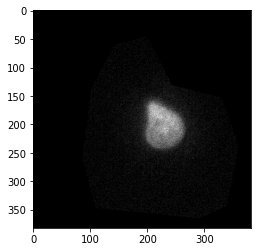

dna
dna - DNA_050.TIF


In [11]:
plt.imshow(X[10].reshape(X.shape[1], X.shape[2]),cmap='gray')
plt.show()

print(Y[10])
print(imageNames[10])

In [12]:
X.shape

(862, 382, 382, 1)

In [13]:
Y.shape

(862,)

In [14]:
len(imageNames)

862

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, Y_integer_encoded, test_size=0.15)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.18)

# Bulid The Model 

In [16]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D

In [17]:
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(382, 382,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))

# model.add(Dropout(0.25))

model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# model.add(Conv2D(256, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 380, 380, 16)      160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 190, 190, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 188, 188, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 94, 94, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 92, 92, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 46, 46, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 44, 44, 64)        3

In [22]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

call = [keras.callbacks.ModelCheckpoint('/content/Cells_Model.h5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')]

history = model.fit(X_train, y_train, epochs = 20, validation_data= (X_val, y_val), batch_size= 64,shuffle=True,callbacks = call)

Epoch 1/20
10/10 [==============================] - 5s 344ms/step - loss: 0.9469 - accuracy: 0.7286 - val_loss: 0.6154 - val_accuracy: 0.7803

Epoch 00001: val_accuracy improved from -inf to 0.78030, saving model to /content/Cells_Model.h5
Epoch 2/20
10/10 [==============================] - 3s 284ms/step - loss: 0.5905 - accuracy: 0.7967 - val_loss: 0.4514 - val_accuracy: 0.8258

Epoch 00002: val_accuracy improved from 0.78030 to 0.82576, saving model to /content/Cells_Model.h5
Epoch 3/20
10/10 [==============================] - 3s 282ms/step - loss: 0.4357 - accuracy: 0.8300 - val_loss: 0.4597 - val_accuracy: 0.8030

Epoch 00003: val_accuracy did not improve from 0.82576
Epoch 4/20
10/10 [==============================] - 3s 283ms/step - loss: 0.3158 - accuracy: 0.8874 - val_loss: 0.3870 - val_accuracy: 0.8561

Epoch 00004: val_accuracy improved from 0.82576 to 0.85606, saving model to /content/Cells_Model.h5
Epoch 5/20
10/10 [==============================] - 3s 282ms/step - loss: 0.

In [23]:
results = model.evaluate(X_test, y_test)

m2 = keras.models.load_model('Cells_Model.h5')

m2.evaluate(X_test, y_test)

5/5 [==============================] - 1s 51ms/step - loss: 0.3435 - accuracy: 0.9154


[0.343510240316391, 0.9153845906257629]

In [24]:
model.save("my_model_caltech")

INFO:tensorflow:Assets written to: my_model_caltech/assets


In [25]:
m = keras.models.load_model('my_model_caltech')

In [26]:
!zip -r /content/my_model.zip /content/my_model_caltech

  adding: content/my_model_caltech/ (stored 0%)
  adding: content/my_model_caltech/assets/ (stored 0%)
  adding: content/my_model_caltech/variables/ (stored 0%)
  adding: content/my_model_caltech/variables/variables.data-00000-of-00001 (deflated 13%)
  adding: content/my_model_caltech/variables/variables.index (deflated 69%)
  adding: content/my_model_caltech/saved_model.pb (deflated 89%)
  adding: content/my_model_caltech/keras_metadata.pb (deflated 94%)


In [27]:
predected_labels = m.predict_classes(np.array(X))

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [28]:
predictions_test = label_encoder.inverse_transform(predected_labels)

In [29]:
data = {'Image Name':imageNames,'Real lables':Y,'Predected Labels':predictions_test}

df = pd.DataFrame(data)

In [30]:
df

,Image Name,Real lables,Predected Labels
0,er - ER_076.TIF,er,er
1,microtubules - microtubules_002.tif,microtubules,microtubules
2,mitochondria - mitochondria_054.tif,mitochondria,mitochondria
3,endosome - endosome_073.tif,endosome,endosome
4,mitochondria - mitochondria_008.tif,mitochondria,microtubules
...,...,...,...
857,microtubules - microtubules_030.tif,microtubules,microtubules
858,nucleolus - nucleolus_023.tif,nucleolus,nucleolus
859,microtubules - microtubules_046.tif,microtubules,microtubules
860,nucleolus - nucleolus_027.tif,nucleolus,nucleolus


In [31]:
df.to_csv('Predections_Keras_Cells_91.csv')

In [ ]:
history.history

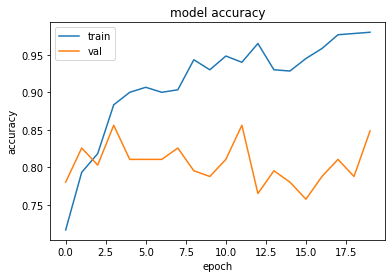

In [35]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

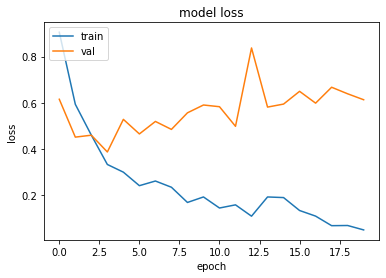

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()